# Lab 1 - Python, Pandas and Numpy
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:guanghua@berkeley.edu))
- **Date:** 29 January 2020
- **Course:** INFO 251: Applied machine learning

### Learning Objectives:
By the end of the lab, you will be able to:
* write your own functions
* know what is a good style of python code
* work with Data Frames using the Pandas library
* produce basic graphs using the Matplotlib library
* become familiar with numpy, matrix operations and iterations

## 1. Python code style
For more details, please refer to [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

* Line length:
    maximum line length is 80 characters.

In [ ]:
users_network_features_home_selected_migrant = users_network_features_home_selected[users_network_features_home_selected['dest'] == dest_dist]

In [ ]:
users_home_migrant = users_home[users_home['dest'] == dest_dist]

* Names: make variable names (nouns) and function names (verbs) descriptive.

* Be consistent between ' and ".

In [ ]:
def sq(n):
    """
    Return the square of n. 
    """
    return n * n

* 1e6 or 10 ** 6 is more readable than 1000000.

* Whitespace: 
always surround these binary operators with a single space on either side: assignment (=), augmented assignment (+=, -= etc.), comparisons (==, <, >, !=, <>, <=, >=, in, not in, is, is not), Booleans (and, or, not).

In [ ]:
i=i+1
submitted +=1

In [ ]:
i = i + 1
submitted += 1

* Blank lines:
two lines between all top-level things (functions, classes, imports, etc)

In [76]:
def foo(x):
    if x >= 0:
        return math.sqrt(x)
    else:
        return None


def bar(x):
    if x < 0:
        return None
    return math.sqrt(x)

* Comments:
    for readability, try to always explain the functionality of your lines by commenting

Rule of thumb
- **Code is for people to read.**
- **Use your best judgment**

## 2. Python features to be aware of

* Use **with** to open files, which can ensure the files are closed.

In [ ]:
with open('some_file.txt', 'r') as f:
    for line in f:
        ###

In [ ]:
f = open('some_file.txt', 'r')
for line in f:
    ###

f.close()
# More frequenty 
# import numpy as np
# np.loadtxt('Path_to_txt_file',delimiter=',', usecols=(0, 2))

* Concatenate path parts with os.path.join .

In [79]:
import os
country_name = 'USA'
month = 'January'
path = os.path.join('a', 'b', country_name, month)
print(path)

a/b/ USA/January


In [ ]:
path = 'a/b/' + country_name + '/' + month
print(path)

* enumerate is great for getting index and elements of an iterator at the same time. 
    - It yields the elements of an iterator, as well as an index number.

In [81]:
for i, x in enumerate([1, 2, 3]):
    print(i)
    print(x)

0
1
1
2
2
3


In [80]:
flag = 0
for x in [1, 2, 3]:
    print(flag)
    print(x)
    flag += 1

0
1
1
2
2
3


* shallow copy vs. deep copy
    - Shallow copy: If we use the assignment operator to assign one list to another list, we just create a new name reference to the original list. If we want to create a new list object, we have to make a copy of the original list. This can be done via a_list[:] or a_list.copy().

In [83]:
list1 = [1, 2]
list2 = list1        # reference
list3 = list1[:]     # shallow copy
list4 = list1.copy() # shallow copy

print('IDs:\nlist1: {}\nlist2: {}\nlist3: {}\nlist4: {}\n'
      .format(id(list1), id(list2), id(list3), id(list4)))

list2[0] = 3
print('list1:', list1)

IDs:
list1: 139917765912008
list2: 139917765912008
list3: 139917762830664
list4: 139917762830536

list1: [3, 2]
list1: [3, 2]


In [5]:
list3[0] = 4
list4[1] = 4
print('\nlist1:', list1)
print('list2:', list2)
print('list3:', list3)
print('list4:', list4)


list1: [3, 2]
list2: [3, 2]
list3: [4, 2]
list4: [1, 4]


* shallow copy vs. deep copy
    - Deep copy: As we have seen above, a shallow copy works fine if we want to create a new list with contents of the original list which we want to modify independently. However, if we are dealing with compound objects (e.g., lists that contain other lists, [read here](https://docs.python.org/2/library/copy.html) for more information) it becomes a little trickier.

In the case of compound objects, 
- a shallow copy would create a new compound object, but it would just insert the references to the contained objects into the new compound object. 
- In contrast, a deep copy would go "deeper" and constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original. 

In [84]:
from copy import deepcopy

list1 = [[1],[2]]
list2 = list1.copy()    # shallow copy
list3 = deepcopy(list1) # deep copy

print('IDs:\nlist1: {}\nlist2: {}\nlist3: {}\n'
      .format(id(list1), id(list2), id(list3)))

#print('IDs:\nlist1[0]: {}\nlist2[0]: {}\nlist3[0]: {}\n'
#      .format(id(list1[0]), id(list2[0]), id(list3[0])))

list2[0][0] = 3
print('list1:', list1)

IDs:
list1: 139917762307848
list2: 139917762309320
list3: 139917762307976

IDs:
list1[0]: 139917762053832
list2[0]: 139917762053832
list3[0]: 139917762833928

list1: [[3], [2]]


In [85]:
id(list1[0])

139917762053832

In [86]:
id(list2[0])

139917762053832

In [9]:
list3[0][0] = 5
print('\nlist1:', list1)
print('list2:', list2)
print('list3:', list3)


list1: [[3], [2]]
list2: [[3], [2]]
list3: [[5], [2]]


## 3. Working with data

### 3.1 Pandas

In [87]:
import pandas as pd

In [88]:
# loading a csv
auto_df = pd.read_csv('Auto.csv')

- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

In [89]:
auto_df.shape

(397, 9)

In [90]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [91]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [92]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [107]:
auto_origin = auto_df.groupby('origin', as_index=False)['weight'].mean()

In [108]:
auto_origin

,origin,weight
0,1,3363.250000
1,2,2423.300000
2,3,2221.227848


#### Exercise (adapted from Itroduction to Satistical Learning, James et al. (2013), Chapter 2, Exercise 9.

http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf (page 56)

a) Are there missing values? If so, remove the rows with missing value.

In [61]:
auto_df = auto_df[auto_df.horsepower != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype('float')
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


b) Which predictors are quantitative and which are qualitative?

- Quantitative: 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'
- Qualitative: 'origin', 'name'

c) What is the *range* of each quantitative predictor?

In [62]:
quan_v = ['mpg', 'cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'year']
pd.DataFrame({'min':auto_df[quan_v].min(), 'max':auto_df[quan_v].max()})

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0


d) What is the mean and standard deviation of each quantitative predictor?

In [63]:
pd.DataFrame({'mean':auto_df[quan_v].mean(), 'sd':auto_df[quan_v].std()})

,mean,sd
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


e) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of **mpg**.

In [114]:
auto_df_2 = auto_df.iloc[list(range(9)) + list(range(85, len(auto_df))),]

print(auto_df_2.describe())
auto_df_2['mpg'].min()
auto_df_2['mpg'].max()
auto_df_2['mpg'].mean()
auto_df_2['mpg'].std()

              mpg   cylinders  displacement       weight  acceleration  \
count  321.000000  321.000000    321.000000   321.000000    321.000000   
mean    24.438629    5.370717    187.049844  2933.962617     15.723053   
std      7.908184    1.653486     99.635385   810.642938      2.680514   
min     11.000000    3.000000     68.000000  1649.000000      8.500000   
25%     18.000000    4.000000    100.000000  2215.000000     14.000000   
50%     23.900000    4.000000    145.000000  2795.000000     15.500000   
75%     30.700000    6.000000    250.000000  3504.000000     17.300000   
max     46.600000    8.000000    455.000000  4997.000000     24.800000   

             year      origin  
count  321.000000  321.000000  
mean    77.152648    1.598131  
std      3.111230    0.816163  
min     70.000000    1.000000  
25%     75.000000    1.000000  
50%     77.000000    1.000000  
75%     80.000000    2.000000  
max     82.000000    3.000000  


7.908184248945195

f) What is the mean and standard deviation of **mpg** for US-made cars (origin = 1)?

In [115]:
print(auto_df[auto_df.origin == 1]['mpg'].mean())
print(auto_df[auto_df.origin == 1]['mpg'].std())

20.071774193548382
6.413145160339849


### 3.2 Matplotlib

#### Enable inline printing of matplotlib plots

In [119]:
%matplotlib inline

In [120]:
import matplotlib.pyplot as plt

#### Boxplots

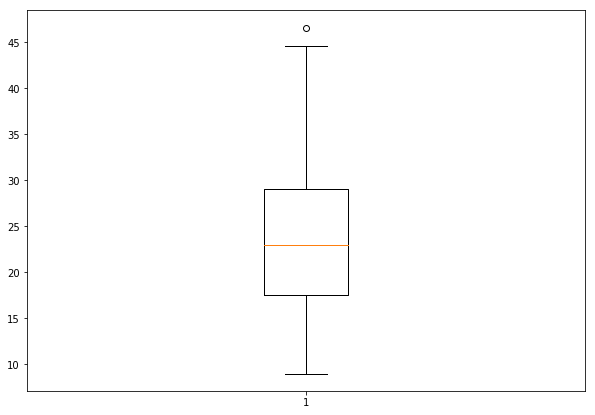

In [121]:
plt.figure(figsize=(10, 7))
plt.boxplot(auto_df['mpg'])
plt.show()

#### Histograms

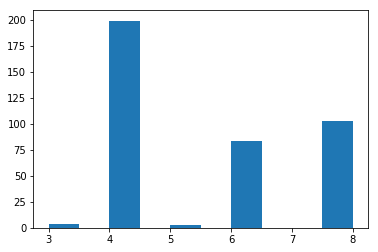

In [69]:
plt.figure()
plt.hist(auto_df['cylinders'])
plt.show()

#### Scatter Plots

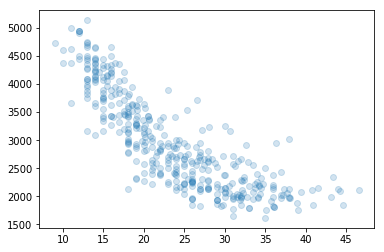

In [122]:
plt.figure()
plt.scatter(auto_df['mpg'], auto_df['weight'], alpha=0.2)
plt.show()

#### scatter matrix

In [74]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

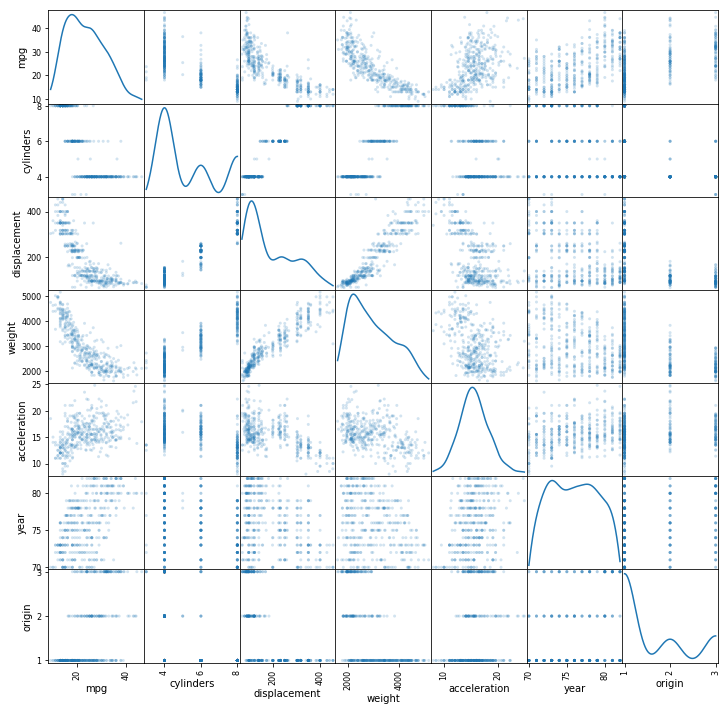

In [124]:
plt.figure()
scatter_matrix(auto_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

## 4. Crash course in numpy

In [5]:
import numpy as np
from collections import Counter

In [131]:
python_list = [1, 1, 2, 2, 4, 5, 6, 5, 1]
numpy_list = np.array([2,3,1,0])

In [132]:
def get_mean(lst):
     return np.mean(lst)

In [133]:
print(get_mean(python_list))
print(get_mean(numpy_list))
a = Counter(python_list).most_common()
print(a)

3.0
1.5
[(1, 3), (2, 2), (5, 2), (4, 1), (6, 1)]


In [162]:
def get_mode(lst):
    # most_common: https://docs.python.org/2/library/collections.html#collections.Counter.most_common


# can also be done using a dictionary

In [163]:
a = Counter(python_list).most_common()
max_occ = max([j for _, j in a])
max_occ_list = []
for m, j in a:
    max_occ_list.append(j)
print(max(max_occ_list))
print(get_mode(python_list))

3
[1]


In [138]:
i_list = []
for i, j in a:
    if j == max_occ:
        i_list.append(i)
print(max_occ)

3


In [142]:
def custom_mean(lst):
# Add Your Code here
    
custom_mean(python_list)
custom_mean(numpy_list)

1.5

In [43]:
A = np.random.rand(5,5)
B = np.ones((5,5))
print(np.linalg.norm(A,2)) # max singular value
print(B)

2.3624995187233635
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [147]:
print(np.matmul(A,B))# conventional matrix multiplication
print(np.multiply(A,B))# elelemnt-wise
print(A*B)# elelemnt-wise
print(A@B)# conventional matrix multiplication
print(A)

[[1.89195626 1.89195626 1.89195626 1.89195626 1.89195626]
 [2.34518709 2.34518709 2.34518709 2.34518709 2.34518709]
 [2.43054455 2.43054455 2.43054455 2.43054455 2.43054455]
 [2.49049569 2.49049569 2.49049569 2.49049569 2.49049569]
 [2.56984872 2.56984872 2.56984872 2.56984872 2.56984872]]
[[0.59078081 0.01673917 0.33929073 0.22753947 0.71760608]
 [0.43636672 0.03054208 0.30755779 0.81121623 0.75950427]
 [0.39874026 0.73821659 0.30748979 0.53314913 0.45294879]
 [0.38915706 0.78912749 0.61483117 0.44867943 0.24870054]
 [0.82705269 0.61310559 0.67516202 0.331673   0.12285542]]
[[0.59078081 0.01673917 0.33929073 0.22753947 0.71760608]
 [0.43636672 0.03054208 0.30755779 0.81121623 0.75950427]
 [0.39874026 0.73821659 0.30748979 0.53314913 0.45294879]
 [0.38915706 0.78912749 0.61483117 0.44867943 0.24870054]
 [0.82705269 0.61310559 0.67516202 0.331673   0.12285542]]
[[1.89195626 1.89195626 1.89195626 1.89195626 1.89195626]
 [2.34518709 2.34518709 2.34518709 2.34518709 2.34518709]
 [2.4305445

In [160]:
'''
Computation of matirx powers of A to the power of 10
'''
np.set_printoptions(precision=3)


def matrix_power_f(A, pow = 10):



pow = 20
print(matrix_power_f(A, pow))
print(np.linalg.matrix_power(A, pow))

[[4102918.304 3297859.226 3451364.836 3523790.34  3572155.788]
 [5279575.204 4243636.97  4441165.742 4534361.818 4596597.767]
 [5429674.041 4364283.979 4567428.514 4663274.172 4727279.5  ]
 [5560789.947 4469672.818 4677722.893 4775883.035 4841433.965]
 [5497486.976 4418790.916 4624472.588 4721515.296 4786320.007]]
[[4102918.304 3297859.226 3451364.836 3523790.34  3572155.788]
 [5279575.204 4243636.97  4441165.742 4534361.818 4596597.767]
 [5429674.041 4364283.979 4567428.514 4663274.172 4727279.5  ]
 [5560789.947 4469672.818 4677722.893 4775883.035 4841433.965]
 [5497486.976 4418790.916 4624472.588 4721515.296 4786320.007]]


In [161]:
def matrix_power_w(A, pow = 10):


print(matrix_power_w(A, pow))
print(np.linalg.matrix_power(A, pow))


[[4102918.304 3297859.226 3451364.836 3523790.34  3572155.788]
 [5279575.204 4243636.97  4441165.742 4534361.818 4596597.767]
 [5429674.041 4364283.979 4567428.514 4663274.172 4727279.5  ]
 [5560789.947 4469672.818 4677722.893 4775883.035 4841433.965]
 [5497486.976 4418790.916 4624472.588 4721515.296 4786320.007]]
[[4102918.304 3297859.226 3451364.836 3523790.34  3572155.788]
 [5279575.204 4243636.97  4441165.742 4534361.818 4596597.767]
 [5429674.041 4364283.979 4567428.514 4663274.172 4727279.5  ]
 [5560789.947 4469672.818 4677722.893 4775883.035 4841433.965]
 [5497486.976 4418790.916 4624472.588 4721515.296 4786320.007]]
